In [3]:
import dowhy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.getLogger("dowhy").setLevel(logging.INFO)
#dataset = pd.read_csv('https://raw.githubusercontent.com/Sid-darthvader/DoWhy-The-Causal-Story-Behind-Hotel-Booking-Cancellations/master/hotel_bookings.csv')
dataset=pd.read_csv('hotel_data.csv')
print(dataset.head())
print(dataset.tail())
print(dataset['is_canceled'])

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [2]:
#logistic doesnt work for 0.4
dowhy.__version__

'0.5.1'

In [3]:

dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
list(dataset.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [5]:
type(dataset)

pandas.core.frame.DataFrame

In [6]:
dataset["stays_in_weekend_nights"]

0         0
1         0
2         0
3         0
4         0
         ..
109884    2
109885    2
109886    2
109887    1
109888    2
Name: stays_in_weekend_nights, Length: 109889, dtype: int64

In [7]:
# Total stay in nights
dataset['total_stay'] = dataset['stays_in_week_nights']+dataset['stays_in_weekend_nights']
# Total number of guests
dataset['guests'] = dataset['adults']+dataset['children'] +dataset['babies']
# Creating the different_room_assigned feature
dataset['different_room_assigned']=0
slice_indices =dataset['reserved_room_type']!=dataset['assigned_room_type']
dataset.loc[slice_indices,'different_room_assigned']=1
# Deleting older features
#dataset = dataset.drop(['stays_in_week_nights','stays_in_weekend_nights','adults','children','babies'
#                        ,'reserved_room_type','assigned_room_type'],axis=1)
print(dataset.columns)
dataset.head()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stay', 'guests',
       'different_room_assigned'],
      dtype='object')


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,guests,different_room_assigned
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,1,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,1,1.0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03,2,2.0,0


In [8]:
print(dataset.isnull().sum()) # Country,Agent,Company contain 488,16340,112593 missing entries



hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              15661
company         

In [9]:
dataset = dataset.drop(['agent','company'],axis=1)
# Replacing missing countries with most freqently occuring countries
dataset['country']= dataset['country'].fillna(dataset['country'].mode()[0])
print(dataset.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       1
total_of_special_requests   

In [10]:
#how to use time? these were dropped. CausalImpact uses time. 
#q1) what other methods?
#https://www.youtube.com/watch?v=GTgZfCltMm8
dataset = dataset.drop(['reservation_status','reservation_status_date','arrival_date_day_of_month'],axis=1)
dataset = dataset.drop(['arrival_date_year'],axis=1)

<h6>https://www.youtube.com/watch?v=GTgZfCltMm8</h6>
<img src="time1.png">
<img src="time2.png">
<h6>contrast RNN vs. bayesian structural time series model; causal impact uses BSTS</h6>
<p>https://multithreaded.stitchfix.com/blog/2016/04/21/forget-arima/</p>


In [11]:
dataset.head()


,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
0,Resort Hotel,0,342,July,27,0,0,2,0.0,0,...,3,No Deposit,0,Transient,0.0,0.0,0.0,0,2.0,0
1,Resort Hotel,0,737,July,27,0,0,2,0.0,0,...,4,No Deposit,0,Transient,0.0,0.0,0.0,0,2.0,0
2,Resort Hotel,0,7,July,27,0,1,1,0.0,0,...,0,No Deposit,0,Transient,75.0,0.0,0.0,1,1.0,1
3,Resort Hotel,0,13,July,27,0,1,1,0.0,0,...,0,No Deposit,0,Transient,75.0,0.0,0.0,1,1.0,0
4,Resort Hotel,0,14,July,27,0,2,2,0.0,0,...,0,No Deposit,0,Transient,98.0,0.0,1.0,2,2.0,0


In [12]:
dataset['different_room_assigned']= dataset['different_room_assigned'].replace(1,True)
dataset['different_room_assigned']= dataset['different_room_assigned'].replace(0,False)
dataset['is_canceled']= dataset['is_canceled'].replace(1,True)
dataset['is_canceled']= dataset['is_canceled'].replace(0,False)
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
0,Resort Hotel,False,342,July,27,0,0,2,0.0,0,...,3,No Deposit,0,Transient,0.0,0.0,0.0,0,2.0,False
1,Resort Hotel,False,737,July,27,0,0,2,0.0,0,...,4,No Deposit,0,Transient,0.0,0.0,0.0,0,2.0,False
2,Resort Hotel,False,7,July,27,0,1,1,0.0,0,...,0,No Deposit,0,Transient,75.0,0.0,0.0,1,1.0,True
3,Resort Hotel,False,13,July,27,0,1,1,0.0,0,...,0,No Deposit,0,Transient,75.0,0.0,0.0,1,1.0,False
4,Resort Hotel,False,14,July,27,0,2,2,0.0,0,...,0,No Deposit,0,Transient,98.0,0.0,1.0,2,2.0,False


In [15]:
counts_sum=0
for i in range(1,10000):
        counts_i = 0
        if i%1000==0:
            print("i:",i)
        rdf = dataset.sample(1000)
        counts_i = rdf[rdf["is_canceled"]== rdf["different_room_assigned"]].shape[0]
        counts_sum+= counts_i
print(counts_sum/10000)

i: 1
i: 2
i: 3
i: 4
i: 5
i: 6
i: 7
i: 8
i: 9
i: 10
i: 11
i: 12
i: 13
i: 14
i: 15
i: 16
i: 17
i: 18
i: 19
i: 20
i: 21
i: 22
i: 23
i: 24
i: 25
i: 26
i: 27
i: 28
i: 29
i: 30
i: 31
i: 32
i: 33
i: 34
i: 35
i: 36
i: 37
i: 38
i: 39
i: 40
i: 41
i: 42
i: 43
i: 44
i: 45
i: 46
i: 47
i: 48
i: 49
i: 50
i: 51
i: 52
i: 53
i: 54
i: 55
i: 56
i: 57
i: 58
i: 59
i: 60
i: 61
i: 62
i: 63
i: 64
i: 65
i: 66
i: 67
i: 68
i: 69
i: 70
i: 71
i: 72
i: 73
i: 74
i: 75
i: 76
i: 77
i: 78
i: 79
i: 80
i: 81
i: 82
i: 83
i: 84
i: 85
i: 86
i: 87
i: 88
i: 89
i: 90
i: 91
i: 92
i: 93
i: 94
i: 95
i: 96
i: 97
i: 98
i: 99
i: 100
i: 101
i: 102
i: 103
i: 104
i: 105
i: 106
i: 107
i: 108
i: 109
i: 110
i: 111
i: 112
i: 113
i: 114
i: 115
i: 116
i: 117
i: 118
i: 119
i: 120
i: 121
i: 122
i: 123
i: 124
i: 125
i: 126
i: 127
i: 128
i: 129
i: 130
i: 131
i: 132
i: 133
i: 134
i: 135
i: 136
i: 137
i: 138
i: 139
i: 140
i: 141
i: 142
i: 143
i: 144
i: 145
i: 146
i: 147
i: 148
i: 149
i: 150
i: 151
i: 152
i: 153
i: 154
i: 155
i: 156
i: 157
i: 158
i:

i: 1174
i: 1175
i: 1176
i: 1177
i: 1178
i: 1179
i: 1180
i: 1181
i: 1182
i: 1183
i: 1184
i: 1185
i: 1186
i: 1187
i: 1188
i: 1189
i: 1190
i: 1191
i: 1192
i: 1193
i: 1194
i: 1195
i: 1196
i: 1197
i: 1198
i: 1199
i: 1200
i: 1201
i: 1202
i: 1203
i: 1204
i: 1205
i: 1206
i: 1207
i: 1208
i: 1209
i: 1210
i: 1211
i: 1212
i: 1213
i: 1214
i: 1215
i: 1216
i: 1217
i: 1218
i: 1219
i: 1220
i: 1221
i: 1222
i: 1223
i: 1224
i: 1225
i: 1226
i: 1227
i: 1228
i: 1229
i: 1230
i: 1231
i: 1232
i: 1233
i: 1234
i: 1235
i: 1236
i: 1237
i: 1238
i: 1239
i: 1240
i: 1241
i: 1242
i: 1243
i: 1244
i: 1245
i: 1246
i: 1247
i: 1248
i: 1249
i: 1250
i: 1251
i: 1252
i: 1253
i: 1254
i: 1255
i: 1256
i: 1257
i: 1258
i: 1259
i: 1260
i: 1261
i: 1262
i: 1263
i: 1264
i: 1265
i: 1266
i: 1267
i: 1268
i: 1269
i: 1270
i: 1271
i: 1272
i: 1273
i: 1274
i: 1275
i: 1276
i: 1277
i: 1278
i: 1279
i: 1280
i: 1281
i: 1282
i: 1283
i: 1284
i: 1285
i: 1286
i: 1287
i: 1288
i: 1289
i: 1290
i: 1291
i: 1292
i: 1293
i: 1294
i: 1295
i: 1296
i: 1297
i: 1298


i: 2212
i: 2213
i: 2214
i: 2215
i: 2216
i: 2217
i: 2218
i: 2219
i: 2220
i: 2221
i: 2222
i: 2223
i: 2224
i: 2225
i: 2226
i: 2227
i: 2228
i: 2229
i: 2230
i: 2231
i: 2232
i: 2233
i: 2234
i: 2235
i: 2236
i: 2237
i: 2238
i: 2239
i: 2240
i: 2241
i: 2242
i: 2243
i: 2244
i: 2245
i: 2246
i: 2247
i: 2248
i: 2249
i: 2250
i: 2251
i: 2252
i: 2253
i: 2254
i: 2255
i: 2256
i: 2257
i: 2258
i: 2259
i: 2260
i: 2261
i: 2262
i: 2263
i: 2264
i: 2265
i: 2266
i: 2267
i: 2268
i: 2269
i: 2270
i: 2271
i: 2272
i: 2273
i: 2274
i: 2275
i: 2276
i: 2277
i: 2278
i: 2279
i: 2280
i: 2281
i: 2282
i: 2283
i: 2284
i: 2285
i: 2286
i: 2287
i: 2288
i: 2289
i: 2290
i: 2291
i: 2292
i: 2293
i: 2294
i: 2295
i: 2296
i: 2297
i: 2298
i: 2299
i: 2300
i: 2301
i: 2302
i: 2303
i: 2304
i: 2305
i: 2306
i: 2307
i: 2308
i: 2309
i: 2310
i: 2311
i: 2312
i: 2313
i: 2314
i: 2315
i: 2316
i: 2317
i: 2318
i: 2319
i: 2320
i: 2321
i: 2322
i: 2323
i: 2324
i: 2325
i: 2326
i: 2327
i: 2328
i: 2329
i: 2330
i: 2331
i: 2332
i: 2333
i: 2334
i: 2335
i: 2336


i: 3242
i: 3243
i: 3244
i: 3245
i: 3246
i: 3247
i: 3248
i: 3249
i: 3250
i: 3251
i: 3252
i: 3253
i: 3254
i: 3255
i: 3256
i: 3257
i: 3258
i: 3259
i: 3260
i: 3261
i: 3262
i: 3263
i: 3264
i: 3265
i: 3266
i: 3267
i: 3268
i: 3269
i: 3270
i: 3271
i: 3272
i: 3273
i: 3274
i: 3275
i: 3276
i: 3277
i: 3278
i: 3279
i: 3280
i: 3281
i: 3282
i: 3283
i: 3284
i: 3285
i: 3286
i: 3287
i: 3288
i: 3289
i: 3290
i: 3291
i: 3292
i: 3293
i: 3294
i: 3295
i: 3296
i: 3297
i: 3298
i: 3299
i: 3300
i: 3301
i: 3302
i: 3303
i: 3304
i: 3305
i: 3306
i: 3307
i: 3308
i: 3309
i: 3310
i: 3311
i: 3312
i: 3313
i: 3314
i: 3315
i: 3316
i: 3317
i: 3318
i: 3319
i: 3320
i: 3321
i: 3322
i: 3323
i: 3324
i: 3325
i: 3326
i: 3327
i: 3328
i: 3329
i: 3330
i: 3331
i: 3332
i: 3333
i: 3334
i: 3335
i: 3336
i: 3337
i: 3338
i: 3339
i: 3340
i: 3341
i: 3342
i: 3343
i: 3344
i: 3345
i: 3346
i: 3347
i: 3348
i: 3349
i: 3350
i: 3351
i: 3352
i: 3353
i: 3354
i: 3355
i: 3356
i: 3357
i: 3358
i: 3359
i: 3360
i: 3361
i: 3362
i: 3363
i: 3364
i: 3365
i: 3366


i: 4268
i: 4269
i: 4270
i: 4271
i: 4272
i: 4273
i: 4274
i: 4275
i: 4276
i: 4277
i: 4278
i: 4279
i: 4280
i: 4281
i: 4282
i: 4283
i: 4284
i: 4285
i: 4286
i: 4287
i: 4288
i: 4289
i: 4290
i: 4291
i: 4292
i: 4293
i: 4294
i: 4295
i: 4296
i: 4297
i: 4298
i: 4299
i: 4300
i: 4301
i: 4302
i: 4303
i: 4304
i: 4305
i: 4306
i: 4307
i: 4308
i: 4309
i: 4310
i: 4311
i: 4312
i: 4313
i: 4314
i: 4315
i: 4316
i: 4317
i: 4318
i: 4319
i: 4320
i: 4321
i: 4322
i: 4323
i: 4324
i: 4325
i: 4326
i: 4327
i: 4328
i: 4329
i: 4330
i: 4331
i: 4332
i: 4333
i: 4334
i: 4335
i: 4336
i: 4337
i: 4338
i: 4339
i: 4340
i: 4341
i: 4342
i: 4343
i: 4344
i: 4345
i: 4346
i: 4347
i: 4348
i: 4349
i: 4350
i: 4351
i: 4352
i: 4353
i: 4354
i: 4355
i: 4356
i: 4357
i: 4358
i: 4359
i: 4360
i: 4361
i: 4362
i: 4363
i: 4364
i: 4365
i: 4366
i: 4367
i: 4368
i: 4369
i: 4370
i: 4371
i: 4372
i: 4373
i: 4374
i: 4375
i: 4376
i: 4377
i: 4378
i: 4379
i: 4380
i: 4381
i: 4382
i: 4383
i: 4384
i: 4385
i: 4386
i: 4387
i: 4388
i: 4389
i: 4390
i: 4391
i: 4392


i: 5306
i: 5307
i: 5308
i: 5309
i: 5310
i: 5311
i: 5312
i: 5313
i: 5314
i: 5315
i: 5316
i: 5317
i: 5318
i: 5319
i: 5320
i: 5321
i: 5322
i: 5323
i: 5324
i: 5325
i: 5326
i: 5327
i: 5328
i: 5329
i: 5330
i: 5331
i: 5332
i: 5333
i: 5334
i: 5335
i: 5336
i: 5337
i: 5338
i: 5339
i: 5340
i: 5341
i: 5342
i: 5343
i: 5344
i: 5345
i: 5346
i: 5347
i: 5348
i: 5349
i: 5350
i: 5351
i: 5352
i: 5353
i: 5354
i: 5355
i: 5356
i: 5357
i: 5358
i: 5359
i: 5360
i: 5361
i: 5362
i: 5363
i: 5364
i: 5365
i: 5366
i: 5367
i: 5368
i: 5369
i: 5370
i: 5371
i: 5372
i: 5373
i: 5374
i: 5375
i: 5376
i: 5377
i: 5378
i: 5379
i: 5380
i: 5381
i: 5382
i: 5383
i: 5384
i: 5385
i: 5386
i: 5387
i: 5388
i: 5389
i: 5390
i: 5391
i: 5392
i: 5393
i: 5394
i: 5395
i: 5396
i: 5397
i: 5398
i: 5399
i: 5400
i: 5401
i: 5402
i: 5403
i: 5404
i: 5405
i: 5406
i: 5407
i: 5408
i: 5409
i: 5410
i: 5411
i: 5412
i: 5413
i: 5414
i: 5415
i: 5416
i: 5417
i: 5418
i: 5419
i: 5420
i: 5421
i: 5422
i: 5423
i: 5424
i: 5425
i: 5426
i: 5427
i: 5428
i: 5429
i: 5430


i: 6338
i: 6339
i: 6340
i: 6341
i: 6342
i: 6343
i: 6344
i: 6345
i: 6346
i: 6347
i: 6348
i: 6349
i: 6350
i: 6351
i: 6352
i: 6353
i: 6354
i: 6355
i: 6356
i: 6357
i: 6358
i: 6359
i: 6360
i: 6361
i: 6362
i: 6363
i: 6364
i: 6365
i: 6366
i: 6367
i: 6368
i: 6369
i: 6370
i: 6371
i: 6372
i: 6373
i: 6374
i: 6375
i: 6376
i: 6377
i: 6378
i: 6379
i: 6380
i: 6381
i: 6382
i: 6383
i: 6384
i: 6385
i: 6386
i: 6387
i: 6388
i: 6389
i: 6390
i: 6391
i: 6392
i: 6393
i: 6394
i: 6395
i: 6396
i: 6397
i: 6398
i: 6399
i: 6400
i: 6401
i: 6402
i: 6403
i: 6404
i: 6405
i: 6406
i: 6407
i: 6408
i: 6409
i: 6410
i: 6411
i: 6412
i: 6413
i: 6414
i: 6415
i: 6416
i: 6417
i: 6418
i: 6419
i: 6420
i: 6421
i: 6422
i: 6423
i: 6424
i: 6425
i: 6426
i: 6427
i: 6428
i: 6429
i: 6430
i: 6431
i: 6432
i: 6433
i: 6434
i: 6435
i: 6436
i: 6437
i: 6438
i: 6439
i: 6440
i: 6441
i: 6442
i: 6443
i: 6444
i: 6445
i: 6446
i: 6447
i: 6448
i: 6449
i: 6450
i: 6451
i: 6452
i: 6453
i: 6454
i: 6455
i: 6456
i: 6457
i: 6458
i: 6459
i: 6460
i: 6461
i: 6462


i: 7378
i: 7379
i: 7380
i: 7381
i: 7382
i: 7383
i: 7384
i: 7385
i: 7386
i: 7387
i: 7388
i: 7389
i: 7390
i: 7391
i: 7392
i: 7393
i: 7394
i: 7395
i: 7396
i: 7397
i: 7398
i: 7399
i: 7400
i: 7401
i: 7402
i: 7403
i: 7404
i: 7405
i: 7406
i: 7407
i: 7408
i: 7409
i: 7410
i: 7411
i: 7412
i: 7413
i: 7414
i: 7415
i: 7416
i: 7417
i: 7418
i: 7419
i: 7420
i: 7421
i: 7422
i: 7423
i: 7424
i: 7425
i: 7426
i: 7427
i: 7428
i: 7429
i: 7430
i: 7431
i: 7432
i: 7433
i: 7434
i: 7435
i: 7436
i: 7437
i: 7438
i: 7439
i: 7440
i: 7441
i: 7442
i: 7443
i: 7444
i: 7445
i: 7446
i: 7447
i: 7448
i: 7449
i: 7450
i: 7451
i: 7452
i: 7453
i: 7454
i: 7455
i: 7456
i: 7457
i: 7458
i: 7459
i: 7460
i: 7461
i: 7462
i: 7463
i: 7464
i: 7465
i: 7466
i: 7467
i: 7468
i: 7469
i: 7470
i: 7471
i: 7472
i: 7473
i: 7474
i: 7475
i: 7476
i: 7477
i: 7478
i: 7479
i: 7480
i: 7481
i: 7482
i: 7483
i: 7484
i: 7485
i: 7486
i: 7487
i: 7488
i: 7489
i: 7490
i: 7491
i: 7492
i: 7493
i: 7494
i: 7495
i: 7496
i: 7497
i: 7498
i: 7499
i: 7500
i: 7501
i: 7502


i: 8408
i: 8409
i: 8410
i: 8411
i: 8412
i: 8413
i: 8414
i: 8415
i: 8416
i: 8417
i: 8418
i: 8419
i: 8420
i: 8421
i: 8422
i: 8423
i: 8424
i: 8425
i: 8426
i: 8427
i: 8428
i: 8429
i: 8430
i: 8431
i: 8432
i: 8433
i: 8434
i: 8435
i: 8436
i: 8437
i: 8438
i: 8439
i: 8440
i: 8441
i: 8442
i: 8443
i: 8444
i: 8445
i: 8446
i: 8447
i: 8448
i: 8449
i: 8450
i: 8451
i: 8452
i: 8453
i: 8454
i: 8455
i: 8456
i: 8457
i: 8458
i: 8459
i: 8460
i: 8461
i: 8462
i: 8463
i: 8464
i: 8465
i: 8466
i: 8467
i: 8468
i: 8469
i: 8470
i: 8471
i: 8472
i: 8473
i: 8474
i: 8475
i: 8476
i: 8477
i: 8478
i: 8479
i: 8480
i: 8481
i: 8482
i: 8483
i: 8484
i: 8485
i: 8486
i: 8487
i: 8488
i: 8489
i: 8490
i: 8491
i: 8492
i: 8493
i: 8494
i: 8495
i: 8496
i: 8497
i: 8498
i: 8499
i: 8500
i: 8501
i: 8502
i: 8503
i: 8504
i: 8505
i: 8506
i: 8507
i: 8508
i: 8509
i: 8510
i: 8511
i: 8512
i: 8513
i: 8514
i: 8515
i: 8516
i: 8517
i: 8518
i: 8519
i: 8520
i: 8521
i: 8522
i: 8523
i: 8524
i: 8525
i: 8526
i: 8527
i: 8528
i: 8529
i: 8530
i: 8531
i: 8532


i: 9445
i: 9446
i: 9447
i: 9448
i: 9449
i: 9450
i: 9451
i: 9452
i: 9453
i: 9454
i: 9455
i: 9456
i: 9457
i: 9458
i: 9459
i: 9460
i: 9461
i: 9462
i: 9463
i: 9464
i: 9465
i: 9466
i: 9467
i: 9468
i: 9469
i: 9470
i: 9471
i: 9472
i: 9473
i: 9474
i: 9475
i: 9476
i: 9477
i: 9478
i: 9479
i: 9480
i: 9481
i: 9482
i: 9483
i: 9484
i: 9485
i: 9486
i: 9487
i: 9488
i: 9489
i: 9490
i: 9491
i: 9492
i: 9493
i: 9494
i: 9495
i: 9496
i: 9497
i: 9498
i: 9499
i: 9500
i: 9501
i: 9502
i: 9503
i: 9504
i: 9505
i: 9506
i: 9507
i: 9508
i: 9509
i: 9510
i: 9511
i: 9512
i: 9513
i: 9514
i: 9515
i: 9516
i: 9517
i: 9518
i: 9519
i: 9520
i: 9521
i: 9522
i: 9523
i: 9524
i: 9525
i: 9526
i: 9527
i: 9528
i: 9529
i: 9530
i: 9531
i: 9532
i: 9533
i: 9534
i: 9535
i: 9536
i: 9537
i: 9538
i: 9539
i: 9540
i: 9541
i: 9542
i: 9543
i: 9544
i: 9545
i: 9546
i: 9547
i: 9548
i: 9549
i: 9550
i: 9551
i: 9552
i: 9553
i: 9554
i: 9555
i: 9556
i: 9557
i: 9558
i: 9559
i: 9560
i: 9561
i: 9562
i: 9563
i: 9564
i: 9565
i: 9566
i: 9567
i: 9568
i: 9569


In [16]:
# Expected Count when there are no booking changes = 49.2%
counts_sum=0
for i in range(1,10000):
        counts_i = 0
        rdf = dataset[dataset["booking_changes"]==0].sample(1000)
        counts_i = rdf[rdf["is_canceled"]== rdf["different_room_assigned"]].shape[0]
        counts_sum+= counts_i
counts_sum/10000

In [17]:
# Expected Count when there are booking changes = 66.4%
counts_sum=0
for i in range(1,10000):
        counts_i = 0
        rdf = dataset[dataset["booking_changes"]>0].sample(1000)
        counts_i = rdf[rdf["is_canceled"]== rdf["different_room_assigned"]].shape[0]
        counts_sum+= counts_i
counts_sum/10000

In [13]:
import pygraphviz
causal_graph = """digraph {
different_room_assigned[label="Different Room Assigned"];
is_canceled[label="Booking Cancelled"];
booking_changes[label="Booking Changes"];
previous_bookings_not_canceled[label="Previous Booking Retentions"];
days_in_waiting_list[label="Days in Waitlist"];
lead_time[label="Lead Time"];
market_segment[label="Market Segment"];
country[label="Country"];
U[label="Unobserved Confounders"];
is_repeated_guest;
total_stay;
guests;
meal;
market_segment -> lead_time;
lead_time->is_canceled; country -> lead_time;
different_room_assigned -> is_canceled;
U -> different_room_assigned; U -> lead_time; U -> is_canceled;
country->meal;
lead_time -> days_in_waiting_list;
days_in_waiting_list ->is_canceled;
previous_bookings_not_canceled -> is_canceled;
previous_bookings_not_canceled -> is_repeated_guest;
is_repeated_guest -> is_canceled;
total_stay -> is_canceled;
guests -> is_canceled;
booking_changes -> different_room_assigned; booking_changes -> is_canceled;
}"""

INFO:dowhy.causal_model:Model to find the causal effect of treatment ['different_room_assigned'] on outcome ['is_canceled']


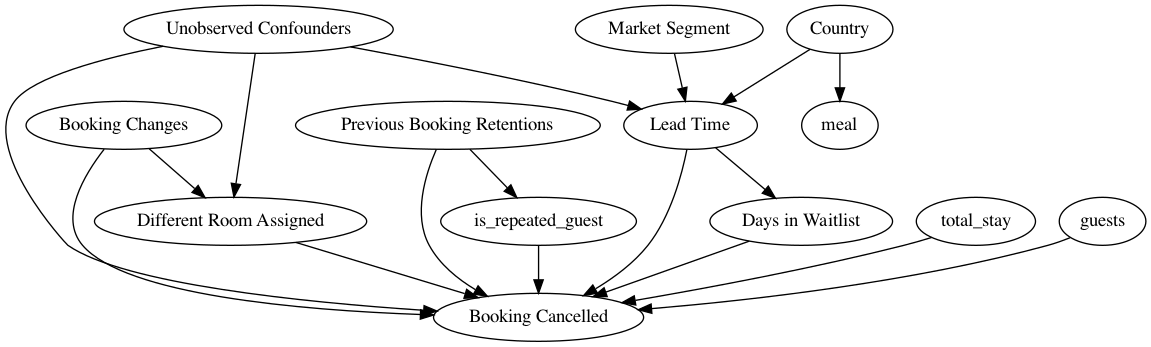

In [14]:
#verify removed columns arent in graph
#
model= dowhy.CausalModel(
        data = dataset,
        graph=causal_graph.replace("\n", " "),
        treatment='different_room_assigned',
        outcome='is_canceled')
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [15]:
#Identify the causal effect
identified_estimand = model.identify_effect()
print(identified_estimand)


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor1 (Default)
Estimand expression:
            d                                                                 
──────────────────────────(Expectation(is_canceled|country,booking_changes,pre
d[different_room_assigned]                                                    

                                                                              
vious_bookings_not_canceled,is_repeated_guest,days_in_waiting_list,meal,market
                                                                              

                                      
_segment,guests,lead_time,total_stay))
                                      
Estimand assumption 1, Unconfoundedness: If U→{different_room_assigned} and U→is_canceled then P(is_canceled|different_room_assigned,country,booking_changes,previous_bookings_not_canceled,is_repeated_guest,days_in_waiting_list,meal,market_segment,guests,lead_time,total_stay,U) = P(is_canceled|differ

In [16]:
import statsmodels.api as sm
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.generalized_linear_model",
                                 confidence_intervals=False,
                                 test_significance=False,
                                 method_params = {
                                            'num_null_simulations':10,
                                            'num_simulations':10,
                                            'num_quantiles_to_discretize_cont_cols':10,
                                            'fit_method': "statsmodels",
                                            'glm_family': sm.families.Binomial(), # logistic regression
                                            'need_conditional_estimates':False
                                  },
                                )
# ATE = Average Treatment Effect
# ATT = Average Treatment Effect on Treated (i.e. those who were assigned a different room)
# ATC = Average Treatment Effect on Control (i.e. those who were not assigned a different room)
print(estimate)

INFO:dowhy.causal_estimator:b: is_canceled~Sigmoid(different_room_assigned+country+booking_changes+previous_bookings_not_canceled+is_repeated_guest+days_in_waiting_list+meal+market_segment+guests+lead_time+total_stay+different_room_assigned*country+different_room_assigned*previous_bookings_not_canceled+different_room_assigned*is_repeated_guest+different_room_assigned*days_in_waiting_list+different_room_assigned*market_segment+different_room_assigned*guests+different_room_assigned*lead_time+different_room_assigned*total_stay)
INFO:dowhy.causal_estimator:INFO: Using Generalized Linear Model Estimator


MissingDataError: exog contains inf or nans

In [45]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_weighting")
# ATE = Average Treatment Effect
# ATT = Average Treatment Effect on Treated (i.e. those who were assigned a different room)
# ATC = Average Treatment Effect on Control (i.e. those who were not assigned a different room)
print(estimate)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Weighting Estimator
INFO:dowhy.causal_estimator:b: is_canceled~different_room_assigned+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                       
──────────────────────────(Expectation(is_canceled|booking_changes))
d[different_room_assigned]                                          
Estimand assumption 1, Unconfoundedness: If U→{different_room_assigned} and U→is_canceled then P(is_canceled|different_room_assigned,booking_changes,U) = P(is_canceled|different_room_assigned,booking_changes)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: is_canceled~different_room_assigned+booking_changes
Target units: ate

## Estimate
Mean value: -0.3983091342293352



In [23]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_stratification",target_units="ate")
# ATE = Average Treatment Effect
# ATT = Average Treatment Effect on Treated (i.e. those who were assigned a different room)
# ATC = Average Treatment Effect on Control (i.e. those who were not assigned a different room)
print(estimate)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~different_room_assigned+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                       
──────────────────────────(Expectation(is_canceled|booking_changes))
d[different_room_assigned]                                          
Estimand assumption 1, Unconfoundedness: If U→{different_room_assigned} and U→is_canceled then P(is_canceled|different_room_assigned,booking_changes,U) = P(is_canceled|different_room_assigned,booking_changes)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: is_canceled~different_room_assigned+booking_changes
Target units: ate

## Estimate
Mean value: -0.39804161601347243



In [24]:
refute1_results=model.refute_estimate(identified_estimand, estimate,
        method_name="random_common_cause")
print(refute1_results)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~different_room_assigned+booking_changes+w_random
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


Refute: Add a Random Common Cause
Estimated effect:-0.39804161601347243
New effect:-0.3979923457432626



In [25]:
refute2_results=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter")
print(refute2_results)


INFO:dowhy.causal_refuters.placebo_treatment_refuter:Refutation over 100 simulated datasets of Random Data treatment
INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~placebo+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_refuters.pla

INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~placebo+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_e

INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~placebo+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_e

INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~placebo+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_e

INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~placebo+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_e

INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~placebo+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_e

INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~placebo+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_e

INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~placebo+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_e

INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~placebo+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_e

INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~placebo+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_refuters.placebo_treatment_refuter:Using a Binomial Distribution with 1 trials and 0.5 probability of success
INFO:dowhy.causal_e

/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_refuters.placebo_treatment_refuter:Making use of Bootstrap as we have more than 100 examples.
                 Note: The greater the number of examples, the more accurate are the confidence estimates


Refute: Use a Placebo Treatment
Estimated effect:-0.39804161601347243
New effect:-0.00033262123318838696
p value:0.45999999999999996



In [26]:
refute3_results=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter")
print(refute3_results)

INFO:dowhy.causal_refuters.data_subset_refuter:Refutation over 0.8 simulated datasets of size 87911.20000000001 each
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~different_room_assigned+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~different_room_as

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~different_room_assigned+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~different_room_assigned+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py

INFO:dowhy.causal_estimator:b: is_canceled~different_room_assigned+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~different_room_assigned+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~different_room_assigned+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~different_room_assigned+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~different_room_assigned+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py

INFO:dowhy.causal_estimator:b: is_canceled~different_room_assigned+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~different_room_assigned+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~different_room_assigned+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~different_room_assigned+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~different_room_assigned+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py

INFO:dowhy.causal_estimator:b: is_canceled~different_room_assigned+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: is_canceled~different_room_assigned+booking_changes
/Users/dougchang/miniconda3/envs/covid/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

Refute: Use a subset of data
Estimated effect:-0.39804161601347243
New effect:-0.3979298855164518
p value:0.49

